In [15]:
import pandas as pd

In [16]:
fd = pd.read_csv('data_science_job.csv')
fd

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [17]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [18]:
fd.isnull()    # return the o/p in boolean form
fd.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,479
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [19]:
fd.isnull().mean() *100   # the %of missing values

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [20]:
fd.shape

(19158, 13)

In [21]:
#CCA will be applied to those which have <5%of missingvalue

col = []
for i in fd.columns :
    if fd[i].isnull().mean()*100< 5  and fd[i].isnull().mean()*100 > 0:
        col.append(i)

In [22]:
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [23]:
fd[col].sample(5
               )

,city_development_index,enrolled_university,education_level,experience,training_hours
1517,0.915,no_enrollment,Graduate,9.0,28.0
13631,0.624,no_enrollment,Graduate,2.0,27.0
16712,0.920,no_enrollment,Graduate,8.0,14.0
17493,0.920,Full time course,Graduate,4.0,124.0
11826,0.920,no_enrollment,High School,12.0,16.0


In [24]:
# so from this particular5column's if i drop the nanvalues
len(fd[col].dropna())

17182

In [25]:
# in precentage how many col's are not nan considering this 5cols nan
len(fd[col].dropna()) / len(fd)

0.8968577095730244

In [26]:
new_fd = fd[col].dropna()
print(fd.shape , new_fd.shape)
new_fd

(19158, 13) (17182, 5)


,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


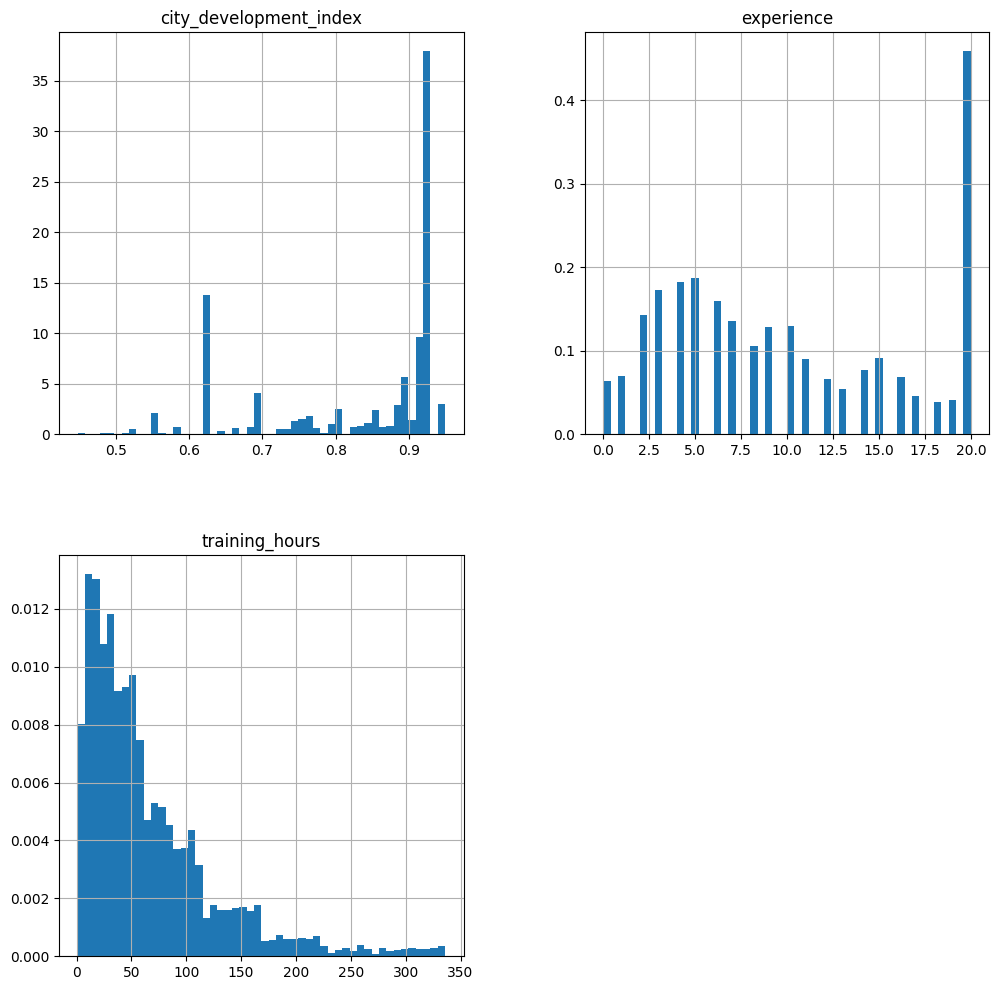

In [27]:
# for the intdatatypes histogram
import matplotlib.pyplot as plt

new_fd.hist(bins=50,density=True,  figsize=(12,12))
plt.show()



PLOTTING HISTOGRAM FOR EACH INDVIDUAL BEFORE APPLYING CCA

<Axes: >

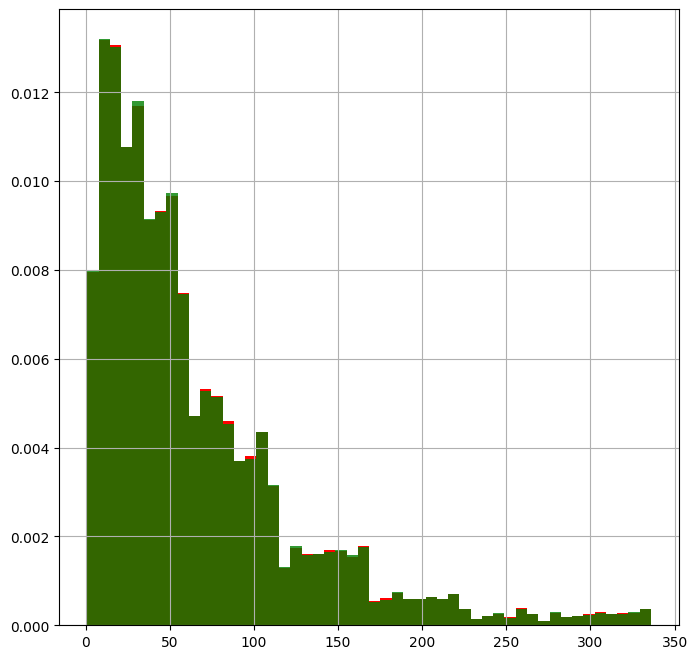

In [57]:
# for training_hours
import matplotlib.pyplot as plt

fig = plt.figure()
axis = fig.add_subplot(111)

fd['training_hours'].hist(bins=50, ax=axis,color='red',figsize=(8,8),density=True)
new_fd['training_hours'].hist(bins=50,color='green', figsize=(8,8),density=True, alpha=0.8)

<Axes: ylabel='Density'>

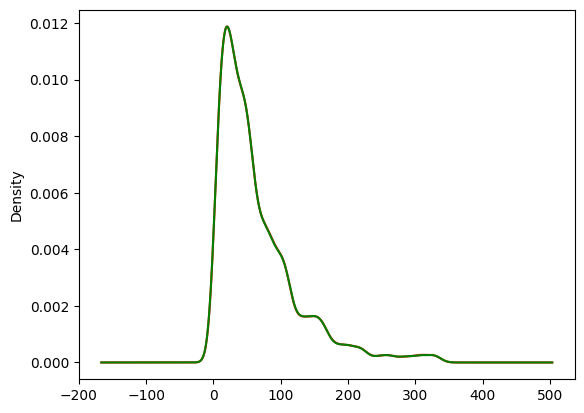

In [29]:
# plotting the pdf plot

fig = plt.figure()
axis = fig.add_subplot(111)

fd['training_hours'].plot.density(color='red')
new_fd['training_hours'].plot.density(color='green')

<Axes: >

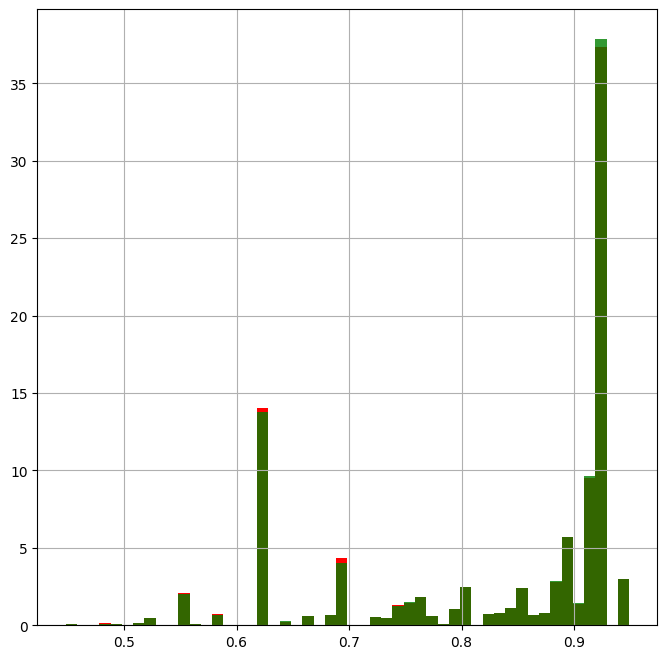

In [60]:
# for city_development_index
import matplotlib.pyplot as plt

fig = plt.figure()
axis = fig.add_subplot(111)

fd['city_development_index'].hist(bins=50, ax=axis,color='red',figsize=(8,8),density=True)
new_fd['city_development_index'].hist(bins=50,color='green', figsize=(8,8),density=True, alpha=0.8)

<Axes: ylabel='Density'>

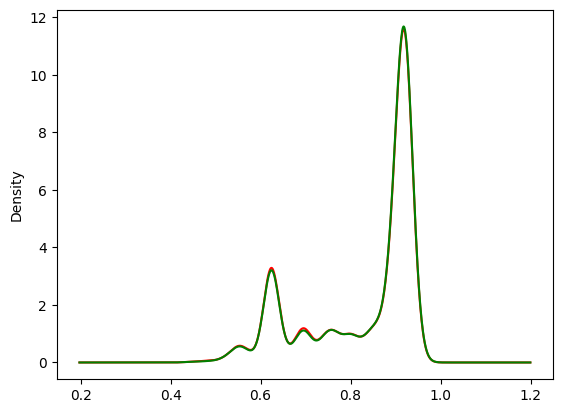

In [31]:
# plotting the pdf plot

fig = plt.figure()
axis = fig.add_subplot(111)

fd['city_development_index'].plot.density(color='red')
new_fd['city_development_index'].plot.density(color='green')

<Axes: >

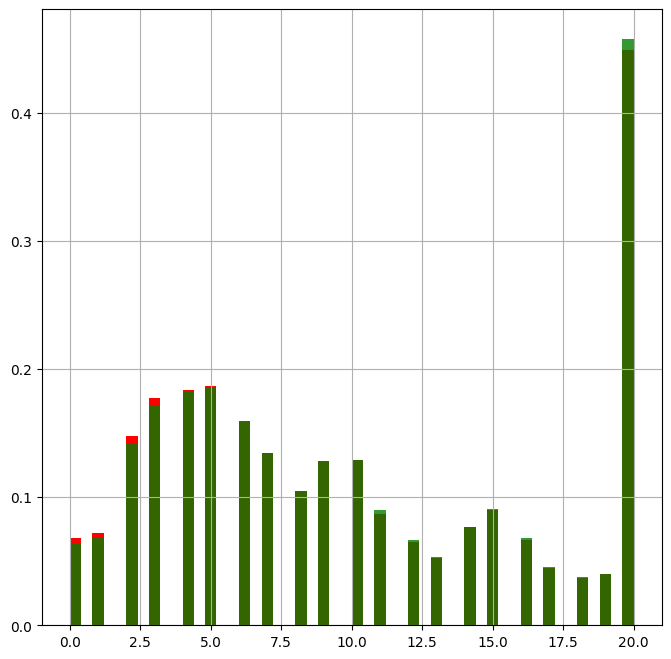

In [61]:
# for city_development_index
import matplotlib.pyplot as plt

fig = plt.figure()
axis = fig.add_subplot(111)

fd['experience'].hist(bins=50, ax=axis,color='red',figsize=(8,8),density=True)
new_fd['experience'].hist(bins=50,color='green', figsize=(8,8),density=True, alpha=0.8)

<Axes: ylabel='Density'>

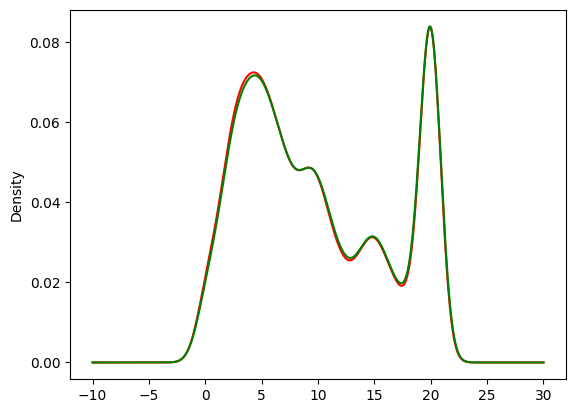

In [33]:
# plotting the pdf plot

fig = plt.figure()
axis = fig.add_subplot(111)

fd['experience'].plot.density(color='red')
new_fd['experience'].plot.density(color='green')

In [41]:
# now for categorical columns of new_fd
fd['enrolled_university'].value_counts()
# this ratio_of diff enrollements should be_maintained after_ performing CCA also

,count
enrolled_university,
no_enrollment,13817
Full time course,3757
Part time course,1198


In [42]:
fd['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [45]:
fd['education_level'].value_counts()

,count
education_level,
Graduate,11598
Masters,4361
High School,2017
Phd,414
Primary School,308


In [53]:
#for % of eachtypes in enrolled_university after removing the missing values
temp = pd.concat ( [

      fd['enrolled_university'].value_counts()/len(fd) ,
      new_fd['enrolled_university'].value_counts()/len(new_fd)

],axis=1
)
temp.columns=['original','cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [55]:
temp = pd.concat ( [

      fd['education_level'].value_counts()/len(fd) ,
      new_fd['education_level'].value_counts()/len(new_fd)

],axis=1
)
temp.columns=['original','cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
